# SGDP variant and population analysis

## Import packages

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
# plotting
from plotnine import ggplot, geom_histogram, geom_bar, geom_point, geom_boxplot, geom_violin, geom_line, geom_jitter, aes, theme, element_blank, element_line, element_text, mapping, xlab, ylab, ggtitle
from plotnine.geoms import geom_vline, geom_boxplot
from plotnine.scales import scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, xlim, ylim
from plotnine.options import figure_size

In [3]:
# plotnine plotting theme

def theme_tufte_func(base_size = 19, base_family = "sans", ticks = False):
    thm = theme(
      legend_background = element_blank(), 
      legend_key = element_blank(),
      panel_background = element_blank(),
      panel_border = element_blank(),
      strip_background = element_blank(),
      plot_background = element_blank(),
      axis_line = element_line(colour = "black", 
                               size = 1
                              ),
      panel_grid = element_blank(),
      axis_text_y = element_text(colour = "black")#,
      #plot_caption = element_text(hjust = 1, size = 9) # 0 or 1 for left or right align
    )
    return thm

## Download data

Here, we read in sample data and metadata for all SGDP samples. Most of this data is available from the AnVIL repo in the SGDP_GRCh38_sample and SGDP_CHM13v2_sample data tables.


In [4]:
# alignment data
sample_alignment_stats_df = pd.read_csv('/home/jupyter/t2t-sgdp/edit/data/saved_dfs/sample_alignment_stats.tsv', sep='\t')
sample_alignment_diff_stats_df = pd.read_csv('/home/jupyter/t2t-sgdp/edit/data/saved_dfs/sample_alignment_difference_stats.tsv', sep='\t')

# variant count data
sample_record_df_joint = pd.read_csv('/home/jupyter/t2t-sgdp/edit/data/saved_dfs/sample_variant_difference_stats.tsv', sep='\t')
chr_record_df_joint = pd.read_csv('/home/jupyter/t2t-sgdp/edit/data/saved_dfs/chr_variant_difference_stats.tsv', sep='\t')


## Plot alignment statistics

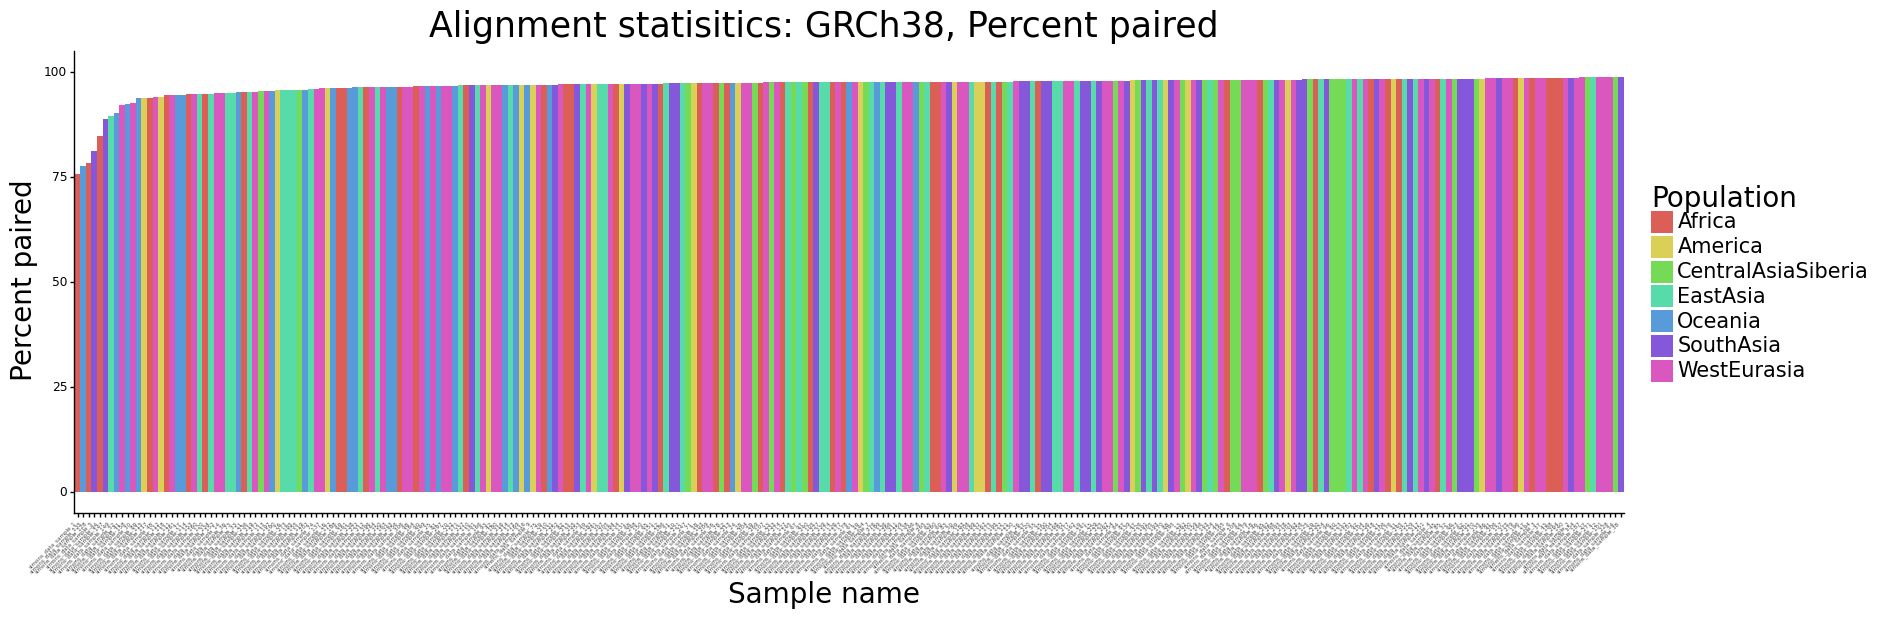

<ggplot: (8752717097681)>

In [5]:
# Plot Percent paired

fill_group = 'Population'
plot_var = 'percent_paired'
plot_var_text = 'Percent paired'
y_lims = [0,100]
asc=True

plot_alignment_df = sample_alignment_stats_df.sort_values(by=plot_var, ascending=asc)

# plot barplot of stats
( 
    ggplot(plot_alignment_df, aes(x='Sample_name', y=plot_var, fill=fill_group)) +
    geom_bar(stat="identity", width=1) + 
    ggtitle("Alignment statisitics: GRCh38, " + plot_var_text) +
    xlab("Sample name") + 
    ylab(plot_var_text) +
    theme_tufte_func() +
    scale_x_discrete(limits=plot_alignment_df['Sample_name']) +
    scale_y_continuous(limits=y_lims) +
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=4),
          figure_size=(20, 6),
          plot_title = element_text(size = 25),
          axis_title_y = element_text(size = 20),
          axis_title_x = element_text(size = 20),
          legend_title = element_text(size = 20),
          legend_text  = element_text(size = 15)
         )
)


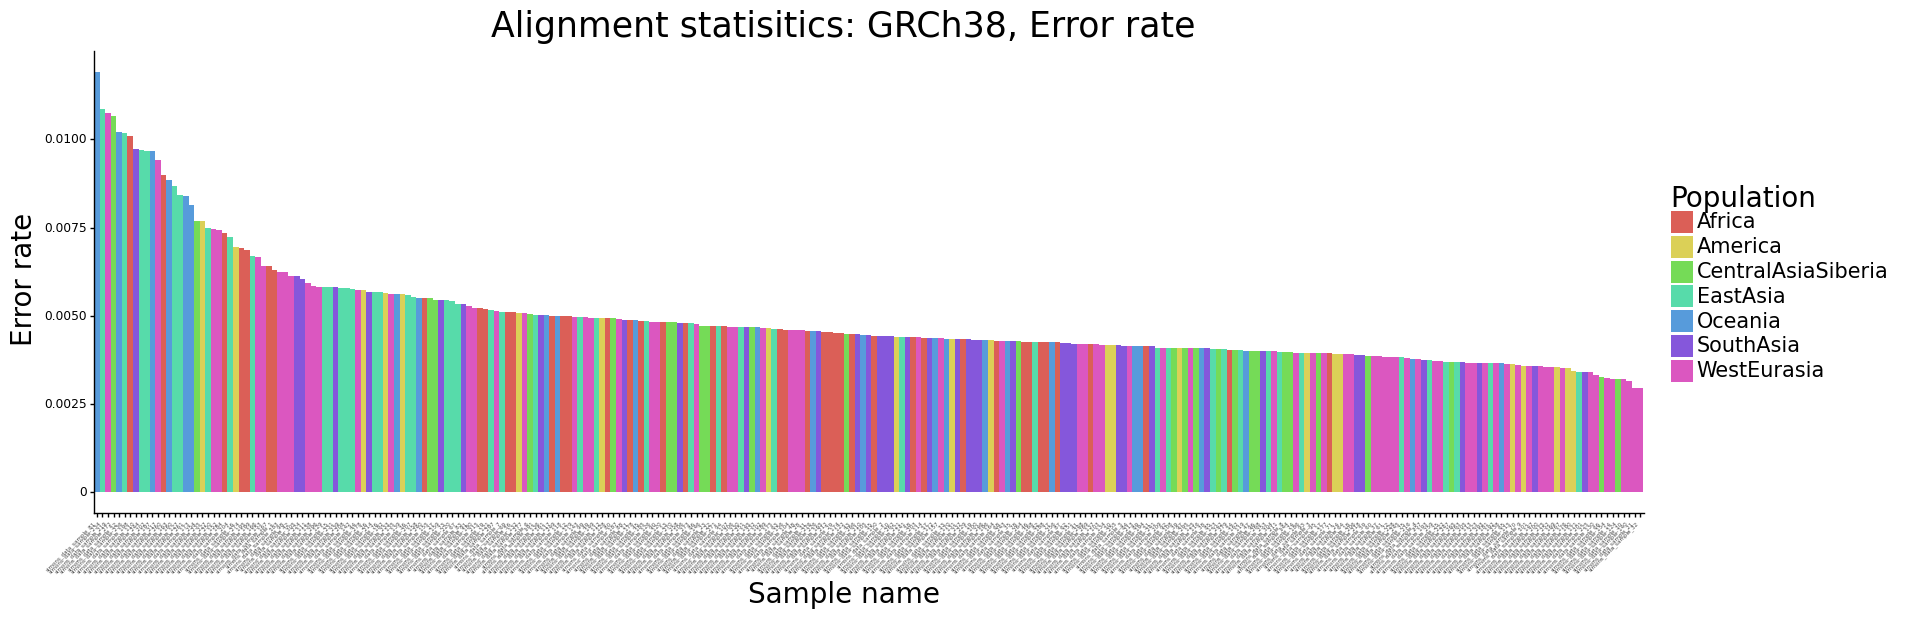

<ggplot: (8752714572937)>

In [6]:
# Plot Error rate

plot_var = 'error_rate'
plot_var_text = 'Error rate'
asc=False

plot_alignment_df = sample_alignment_stats_df.sort_values(by=plot_var, ascending=asc)

# plot barplot of stats
( 
    ggplot(plot_alignment_df, aes(x='Sample_name', y=plot_var, fill=fill_group)) +
    geom_bar(stat="identity", width=1) + 
    ggtitle("Alignment statisitics: GRCh38, " + plot_var_text) +
    xlab("Sample name") + 
    ylab(plot_var_text) +
    theme_tufte_func() +
    scale_x_discrete(limits=plot_alignment_df['Sample_name']) +
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=4),
          figure_size=(20, 6),
          plot_title = element_text(size = 25),
          axis_title_y = element_text(size = 20),
          axis_title_x = element_text(size = 20),
          legend_title = element_text(size = 20),
          legend_text  = element_text(size = 15)
         )
)


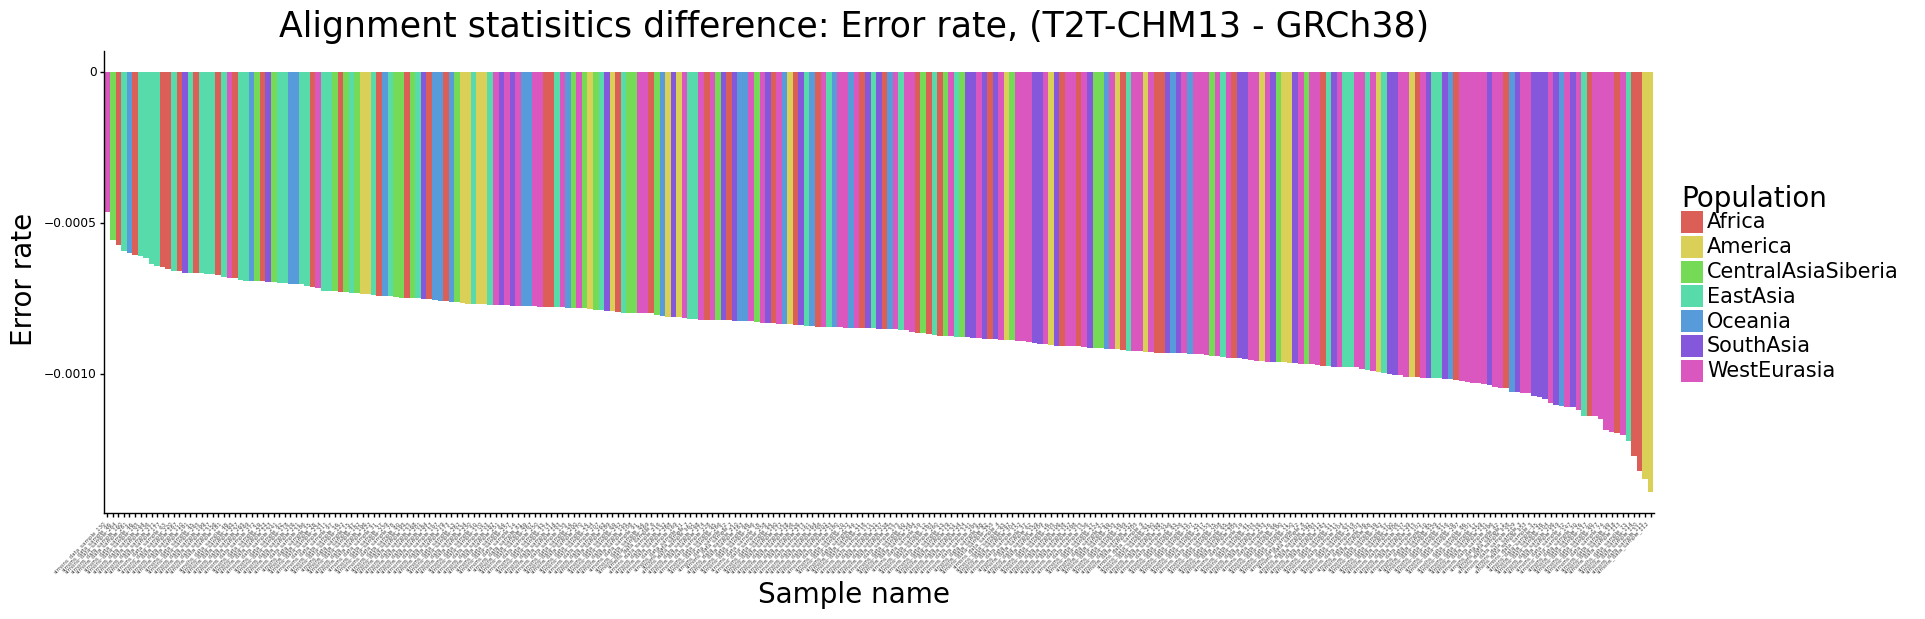

<ggplot: (8752717104365)>

In [7]:
# prepare data for plotting

# Error rate
fill_group = 'Population'
plot_var = 'error_rate_diff'
plot_var_text = 'Error rate'
asc=False
plot_alignment_diff_df = sample_alignment_diff_stats_df.sort_values(by=plot_var, ascending=asc)

# plot barplot of stats
( 
    ggplot(plot_alignment_diff_df, aes(x='Sample_name', y=plot_var, fill=fill_group)) +
    geom_bar(stat="identity", width=1) + 
    ggtitle("Alignment statisitics difference: " + plot_var_text + ", (T2T-CHM13 - GRCh38)" ) +
    xlab("Sample name") + 
    ylab(plot_var_text) +
    theme_tufte_func() +
    scale_x_discrete(limits=plot_alignment_diff_df['Sample_name']) +
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=4),
          figure_size=(20, 6),
          plot_title = element_text(size = 25),
          axis_title_y = element_text(size = 20),
          axis_title_x = element_text(size = 20),
          legend_title = element_text(size = 20),
          legend_text  = element_text(size = 15)
         )
)


## Plot variant counts

In [8]:
chr_record_df_joint

,Unnamed: 0,records,SNPs,indels,chr,Reference
0,0,93765857,78040827,15725030,chr1,CHM13
1,1,59207023,49443609,9763414,chr10,CHM13
2,2,56221562,47234172,8987390,chr11,CHM13
3,3,55857050,46266270,9590780,chr12,CHM13
4,4,42544527,35193431,7351096,chr13,CHM13
5,5,40122114,33059830,7062284,chr14,CHM13
6,6,38651771,32493644,6158127,chr15,CHM13
7,7,37230752,31534962,5695790,chr16,CHM13
8,8,34475034,28304055,6170979,chr17,CHM13
9,9,32461310,27145992,5315318,chr18,CHM13


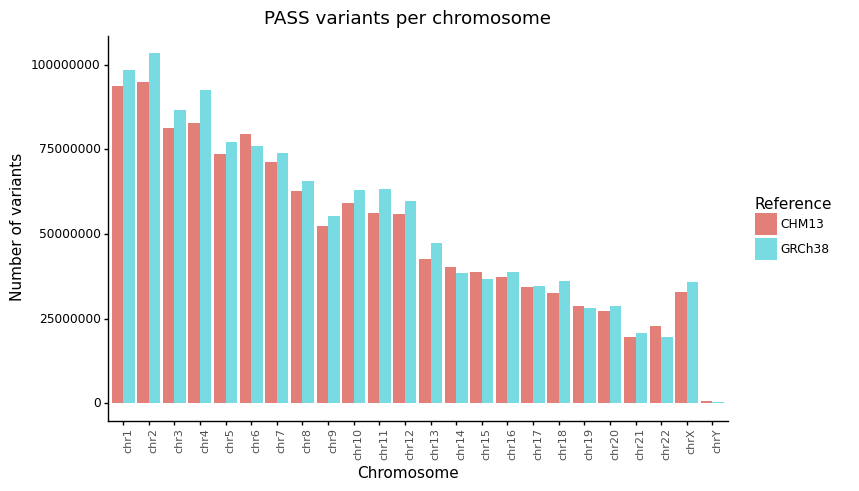

<ggplot: (8752711717357)>

In [9]:
# plot variant coverage by chromosome

( 
    ggplot(chr_record_df_joint, aes(x='chr', y='records', fill='Reference')) +
    geom_bar(position='dodge', stat="identity", alpha=0.8) +
    scale_x_discrete(limits=list(map(lambda _ : 'chr' + str(_), list(range(1,23)) + ['X','Y']))) +
    ggtitle("PASS variants per chromosome") +
    xlab("Chromosome") + 
    ylab("Number of variants") +
    theme_tufte_func() +
    theme(axis_text_x=element_text(rotation=90, hjust=0, size=8),
          figure_size=(8, 5))
)



In [10]:
sample_record_df_joint

,Unnamed: 0,hom,het,SNPs,indels,records,Sample,Population,Region,Reference
0,0,1471640,2846886,4318526,840357,5294643,simons_data_sample_1,Africa,Dinka,CHM13
1,1,1159084,2317556,3476640,674876,4239344,simons_data_sample_10,SouthAsia,Brahmin,CHM13
2,2,1174176,2349915,3524091,708950,4325310,simons_data_sample_100,SouthAsia,Bengali,CHM13
3,3,1127746,2257539,3385285,693504,4166121,simons_data_sample_101,WestEurasia,Lezgin,CHM13
4,4,1098146,2263008,3361154,659743,4106252,simons_data_sample_102,WestEurasia,Greek,CHM13
...,...,...,...,...,...,...,...,...,...,...
553,553,1520175,2193539,3713714,735065,4448779,simons_data_sample_95,CentralAsiaSiberia,Aleut,GRCh38
554,554,1630451,2028026,3658477,703685,4362162,simons_data_sample_96,CentralAsiaSiberia,Eskimo_Sireniki,GRCh38
555,555,1542801,2221293,3764094,741596,4505690,simons_data_sample_97,CentralAsiaSiberia,Even,GRCh38
556,556,1451934,2290675,3742609,710770,4453379,simons_data_sample_98,WestEurasia,Iraqi_Jew,GRCh38


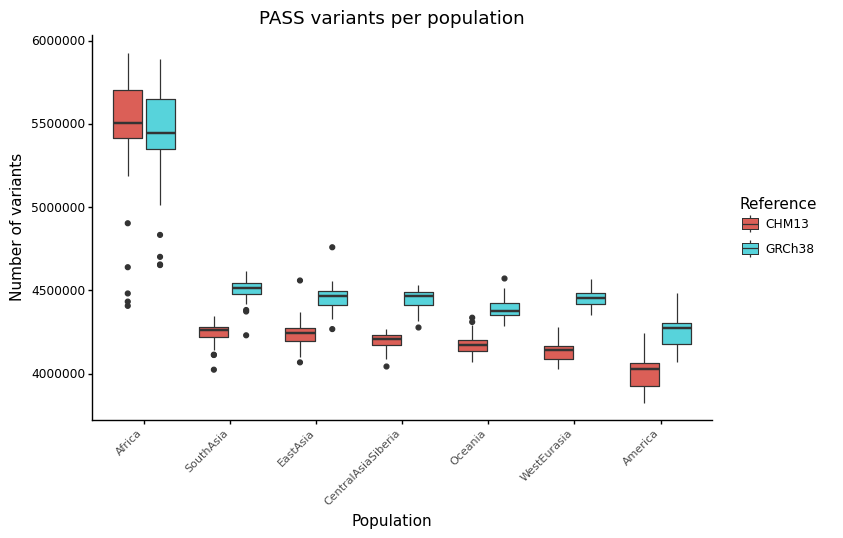

<ggplot: (8752711662321)>

In [11]:
# plot variant count by population

order = ['Africa',
 'SouthAsia',
 'EastAsia',
 'CentralAsiaSiberia',
 'Oceania',
 'WestEurasia',
 'America']

# plot
( 
    ggplot(sample_record_df_joint, aes(x='Population', y='records', fill='Reference')) +
    geom_boxplot() + 
    scale_x_discrete(limits=order) +
    ggtitle("PASS variants per population") +
    xlab("Population") + 
    ylab("Number of variants") +
    theme_tufte_func() +
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=8),
          figure_size=(8, 5))
)
